Show the original image and the transformed image that appears as 
if viewed from a different angle. 

In [1]:
import cv2
import numpy as np

# Load the original image
image = cv2.imread('img1.png')  # Replace with your image path
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Get the image dimensions
height, width = image.shape[:2]

# Define the source points (corners of the original image)
src_points = np.float32([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]])

# Define destination points to simulate a different viewing angle
# These values shift the perspective (like a tilt to the right)
dst_points = np.float32([
    [width * 0.1, height * 0.2],        # Top-left
    [width * 0.9, height * 0.1],        # Top-right
    [width * 0.9, height * 0.9],        # Bottom-right
    [width * 0.1, height * 0.8]         # Bottom-left
])

# Compute the perspective transform matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Apply the perspective warp
transformed_image = cv2.warpPerspective(image, matrix, (width, height))

# Display the original and transformed images
cv2.imshow('Original Image', image)
cv2.imshow('Transformed Image (Different Angle)', transformed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


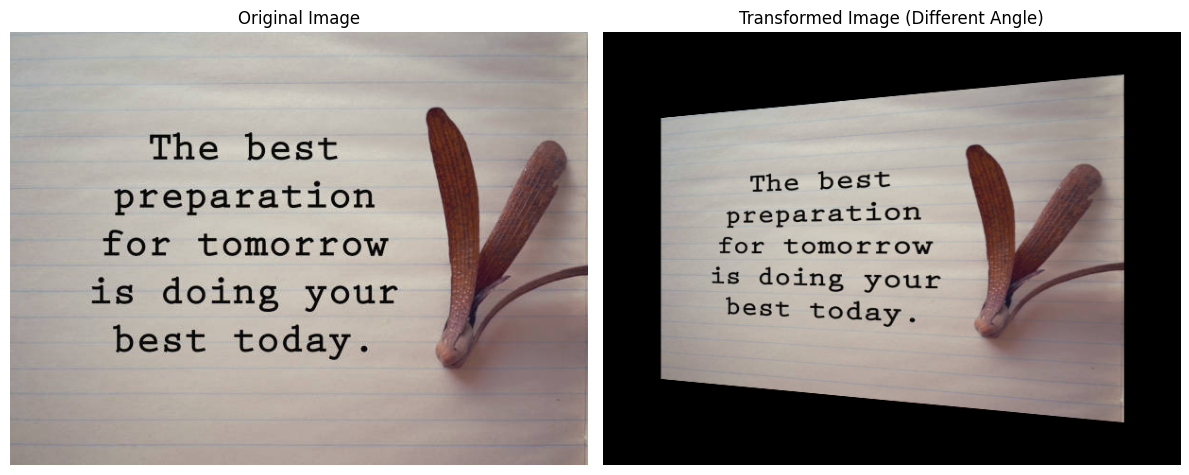

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread('image.png')  # Replace with your image path
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Convert BGR (OpenCV format) to RGB (matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get dimensions
height, width = image.shape[:2]

# Define source and destination points
src_points = np.float32([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]])
dst_points = np.float32([
    [width * 0.1, height * 0.2],
    [width * 0.9, height * 0.1],
    [width * 0.9, height * 0.9],
    [width * 0.1, height * 0.8]
])

# Compute transformation matrix and apply perspective transform
matrix = cv2.getPerspectiveTransform(src_points, dst_points)
transformed = cv2.warpPerspective(image, matrix, (width, height))
transformed_rgb = cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)

# Plot original and transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Transformed Image (Different Angle)")
plt.imshow(transformed_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()
